In [3]:
import numpy as np
import pylab as plt

In [4]:
points_list =[(0,1),(1,5),(5,6),(5,4),(1,2),(2,3),(2,7)]

In [5]:
goal = 7


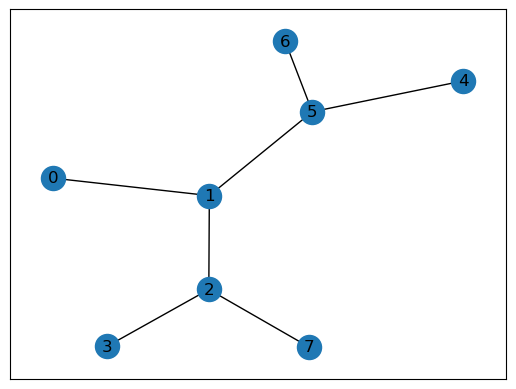

In [6]:
import networkx as nx
G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

In [7]:
MATRIX_SIZE = 8

R = np.matrix(np.ones(shape=(MATRIX_SIZE,MATRIX_SIZE)))
R*=-1

In [8]:
for point in points_list:
    print(point)
    if point[1] == goal:
        R[point] =100
    else:
        R[point]=0
    
    if point[0] == goal:
        R[point[::-1]]=100
    else:
        R[point[::-1]]=0
        
R[goal,goal]=100

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(2, 3)
(2, 7)


In [9]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

In [10]:
gamma=0.8

In [11]:
initial_state=1

In [12]:
def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >=0)[1]
    return av_act


In [13]:
available_act = available_actions(initial_state
                                 )

In [14]:
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

In [15]:
action = sample_next_action(available_act)

In [16]:
def update(current_state, action,gamma):
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
    
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index,size=1))
    else:
        max_index=int(max_index)
    max_value=Q[action,max_index]
    
    Q[current_state,action]=R[current_state,action] +gamma*max_value
    print('max_value',R[current_state,action]+gamma*max_value)
    
    if(np.max(Q)>0):
        return(np.sum(Q/np.max(Q)*100))
    else:
        return(0)
    
update(initial_state,action,gamma)

max_value 0.0


0

In [27]:
scores =[]

for i in range(700):
    current_state=np.random.randint(0,int(Q.shape[0]))
    available_act = available_actions(current_state)
    action =sample_next_action(available_act)
    score=update(current_state,action,gamma)
    scores.append(score)
    print("Score : ",str(score))
print("Trained Q Matrix:")
print(Q/np.max(Q)*100)

current_state=0
steps=[current_state]

max_value 255.9976615973804
Score :  982.7174022293427
max_value 499.99812927790435
Score :  982.7165765667792
max_value 319.9985034223235
Score :  982.7165765667792
max_value 319.9985034223235
Score :  982.7165765667792
max_value 255.9985034223235
Score :  982.7165765667792
max_value 255.9976615973804
Score :  982.7165765667792
max_value 319.9985034223235
Score :  982.7165765667792
max_value 319.9985034223235
Score :  982.7177045031567
max_value 399.9985034223235
Score :  982.7177793323206
max_value 319.9988027378588
Score :  982.7179140248154
max_value 319.9988027378588
Score :  982.7182591743333
max_value 255.99904219028704
Score :  982.7185352939478
max_value 255.99904219028704
Score :  982.7188114135622
max_value 255.99904219028704
Score :  982.7188114135622
max_value 319.9985034223235
Score :  982.7188114135622
max_value 499.99812927790435
Score :  982.7188114135622
max_value 255.99904219028704
Score :  982.7188114135622
max_value 204.79923375222964
Score :  982.7190323092537
max

Most Efficient Path: 
[0, 1, 2, 7]


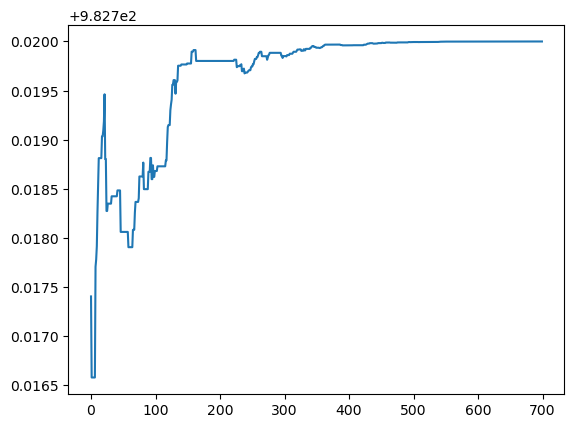

In [28]:
while current_state !=7:
    next_step_index = np.where(Q[current_state,]==np.max(Q[current_state]))[1]
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size=1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index
    
    
    
print("Most Efficient Path: ")
print(steps)


plt.plot(scores)
plt.show()